In [1]:
import networkx as nx

In [2]:
g = nx.DiGraph()

In [3]:
g.add_nodes_from(list("abcdefg"))

In [4]:
g.add_edges_from(
    [("a", "c"), ("b", "c"), ("c", "e"), ("d", "e"), ("f", "g"), ("e", "g")]
)

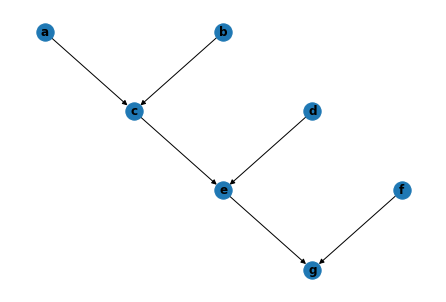

In [28]:
pos = nx.nx_pydot.pydot_layout(g, prog="dot")
nx.draw(g, pos=pos, with_labels=True, font_weight="bold")

In [20]:
input_nodes = [node for node in g.nodes if not g.in_degree(node)]
input_nodes

['a', 'b', 'd', 'f']

In [7]:
goal_nodes = [node for node in g.nodes if not g.out_degree(node)]
goal_nodes

['g']

In [8]:
for node, val in zip("abcdefg", range(5, 40, 5)):
    g.nodes[node]["value"] = val

In [31]:
import numpy as np


def fun_c(a, b):
    return a * np.random.exponential(b,10)


def fun_e(c, d):
    return d * np.tan(c)


def fun_g(e, f):
    return f * np.pi ** (1 / e)

In [10]:
fun_c(**{"a": 5, "b": 10}) # Doble asterisco implica desempaquetar

110132.32897403359

In [32]:
g.nodes["c"]["fun"] = fun_c
g.nodes["e"]["fun"] = fun_e
g.nodes["g"]["fun"] = fun_g

In [33]:
def eval(node):
    if node in input_nodes:
        print(f'Nodo de entrada {node} {g.nodes[node]["value"]}')
        return g.nodes[node]["value"]
    else:
        param = {pred: eval(pred) for pred in g.predecessors(node)}
        g.nodes[node]["value"] = g.nodes[node]["fun"](**param)
        print(f'Nodo de cálculo {node} {g.nodes[node]["value"]}')
        return g.nodes[node]["value"]

In [34]:
eval("g")

Nodo de entrada f 30
Nodo de entrada a 5
Nodo de entrada b 10
Nodo de cálculo c [160.7895277   92.75879178  22.46135909  11.5388468    3.72538775
  14.02160384 310.24749365  65.44461431  19.57049603   1.03497246]
Nodo de entrada d 20
Nodo de cálculo e [  12.77152123 -243.92773362   10.16461526  -33.11879193   13.21212247
  172.29450754  -19.40031611  -11.68696643   17.57465133   33.6832414 ]
Nodo de cálculo g [32.81313279 29.85954266 33.5761666  28.98078489 32.71519906 30.19998452
 28.28104092 27.20084685 32.01910207 31.03707718]


array([32.81313279, 29.85954266, 33.5761666 , 28.98078489, 32.71519906,
       30.19998452, 28.28104092, 27.20084685, 32.01910207, 31.03707718])

In [14]:
30 * np.pi ** (1 / (20 * np.tan(5 * np.exp(10))))

32.31133762310789

In [15]:
fun_g(g.nodes["e"]["value"], g.nodes["f"]["value"])

32.31133762310789

In [16]:
fun_e(g.nodes["c"]["value"], g.nodes["d"]["value"])

15.423303607947446

In [17]:
g.nodes["e"]["value"]

15.423303607947446

In [18]:
fun_c(g.nodes["a"]["value"], g.nodes["b"]["value"])

110132.32897403359

In [19]:
g.nodes["c"]["value"]

110132.32897403359